In [1]:
import pandas as pd

In [2]:
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

plt.style.use("ggplot")
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [3]:
df = pd.read_csv("movies.csv")

In [4]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [5]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [6]:
# FIRST WE WILL LOOK FOR ANY MISSING DATA-

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [8]:
# THEN WE WILL REPLACE THE MISSING DATA FROM GROSS AND BENEFIT COLUMNS WITH THEIR RESPECTIVE MEAN.

for col in df.columns:
    print(df[col].isnull())

0       False
1       False
2       False
3       False
4       False
        ...  
7663    False
7664    False
7665    False
7666    False
7667    False
Name: name, Length: 7668, dtype: bool
0       False
1       False
2       False
3       False
4       False
        ...  
7663     True
7664     True
7665     True
7666     True
7667     True
Name: rating, Length: 7668, dtype: bool
0       False
1       False
2       False
3       False
4       False
        ...  
7663    False
7664    False
7665    False
7666    False
7667    False
Name: genre, Length: 7668, dtype: bool
0       False
1       False
2       False
3       False
4       False
        ...  
7663    False
7664    False
7665    False
7666    False
7667    False
Name: year, Length: 7668, dtype: bool
0       False
1       False
2       False
3       False
4       False
        ...  
7663    False
7664    False
7665    False
7666    False
7667    False
Name: released, Length: 7668, dtype: bool
0       False
1       False
2    

In [9]:
df['budget']

0       19000000.0
1        4500000.0
2       18000000.0
3        3500000.0
4        6000000.0
           ...    
7663        7000.0
7664           NaN
7665       58750.0
7666       15000.0
7667           NaN
Name: budget, Length: 7668, dtype: float64

In [10]:
np.isnan(df['budget'][1])

False

In [11]:
np.nanmean(df['budget']).round()

35589876.0

In [12]:
budget_nanmean = np.nanmean(df['budget']).round()

In [13]:
budget_nanmean

35589876.0

In [14]:
np.dtype(df['budget'])

dtype('float64')

In [15]:
for i in range(df['budget'].shape[0]):
    df['budget'][i] = np.where(np.isnan(df['budget'][i]) == True,
                            budget_nanmean,
                            df['budget'][i])
             

In [16]:
df['budget'].shape[0]

7668

In [17]:
range(7668)

range(0, 7668)

In [18]:
df['budget']

0       19000000.0
1        4500000.0
2       18000000.0
3        3500000.0
4        6000000.0
           ...    
7663        7000.0
7664    35589876.0
7665       58750.0
7666       15000.0
7667    35589876.0
Name: budget, Length: 7668, dtype: float64

In [19]:
df['budget']

0       19000000.0
1        4500000.0
2       18000000.0
3        3500000.0
4        6000000.0
           ...    
7663        7000.0
7664    35589876.0
7665       58750.0
7666       15000.0
7667    35589876.0
Name: budget, Length: 7668, dtype: float64

In [20]:
np.nanmean(df['gross']).round()

78500541.0

In [21]:
gross_nanmean = np.nanmean(df['gross']).round()

In [22]:
gross_nanmean

78500541.0

In [23]:
for i in range(df['gross'].shape[0]):
    df['gross'][i] = np.where(np.isnan(df['gross'][i]) == True,
                            gross_nanmean,
                            df['gross'][i])

In [24]:
df['gross']

0        46998772.0
1        58853106.0
2       538375067.0
3        83453539.0
4        39846344.0
           ...     
7663     78500541.0
7664     78500541.0
7665     78500541.0
7666     78500541.0
7667     78500541.0
Name: gross, Length: 7668, dtype: float64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    7668 non-null   float64
 12  gross     7668 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [26]:
# CONFIRMED THAT THERE IS NO MISSING VALUE ANYMORE, EXCEPT IN RATING WHICH CAN BE NEGLECTED

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 0%
gross - 0%
company - 0%
runtime - 0%


In [27]:
#CHANGING DATA TYPES OF BUDGET AND GROSS COLUMN INTO INT.

df['budget'] = df['budget'].astype('int64')

In [28]:
df['gross'] = df['gross'].astype('int64')

In [29]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [30]:
df['released'] = df['released'].astype('str')

In [31]:
pd.set_option('display.max_rows', None)

In [32]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [33]:
# EXTRACTING EXACT RELEASE YEAR FROM RELEASED COLUMN, AS THERE ARE SOME MISMATCHES IN RELEASE DATE YEAR.


df['release_year'] = df['released'].apply(lambda x: str(x).split(' (')[0])
print(df)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [34]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_year
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,"June 13, 1980"
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,"July 2, 1980"
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,"June 20, 1980"
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,"July 2, 1980"
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,"July 25, 1980"


In [35]:
df['release_year'].str[-4:]

0       1980
1       1980
2       1980
3       1980
4       1980
5       1980
6       1980
7       1980
8       1981
9       1980
10      1980
11      1984
12      1980
13      1980
14      1980
15      1980
16      1980
17      1980
18      1980
19      1980
20      1980
21      1981
22      1980
23      1980
24      1980
25      1980
26      1980
27      1980
28      1980
29      1980
30      1980
31      1980
32      1980
33      1981
34      1980
35      1980
36      1980
37      1980
38      1980
39      1980
40      1981
41      1980
42      1980
43      1980
44      1980
45      1980
46      1980
47      1980
48      1980
49      1981
50      1980
51      1980
52      1980
53      1980
54      1981
55      1980
56      1980
57      1980
58      1980
59      1981
60      1980
61      1980
62      1981
63      1980
64      1980
65      1980
66      1980
67      1980
68      1980
69      1980
70      1980
71      1980
72      1980
73      1980
74      1980
75      1980
76      1980

In [36]:
df['release_year'] = df['release_year'].str[-4:]

In [37]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_year
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [38]:
# SORTING THE DATA AS PER HIGHEST GROSS EARNINGS.

df.sort_values(by= ['gross'], inplace = False, ascending = False).head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_year
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


In [39]:
df = df.sort_values(by= ['gross'], inplace = False, ascending = False)

In [40]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_year
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


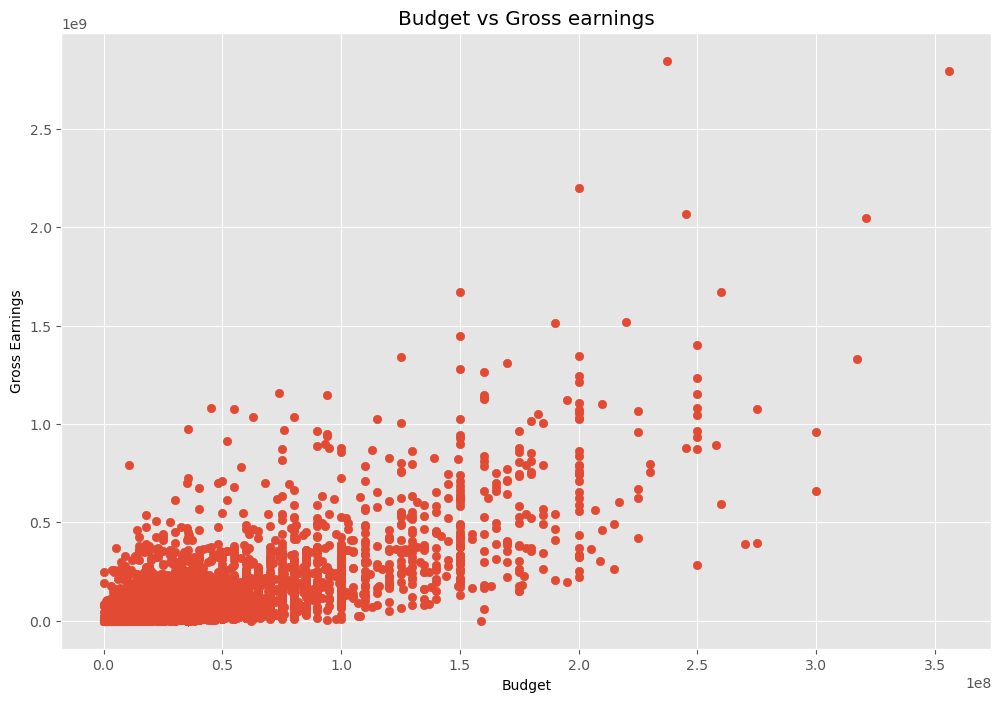

In [41]:
plt.scatter(x = df['budget'], y = df['gross'])
plt.title('Budget vs Gross earnings')
plt.xlabel('Budget')
plt.ylabel('Gross Earnings')



plt.show()

<Axes: xlabel='budget', ylabel='gross'>

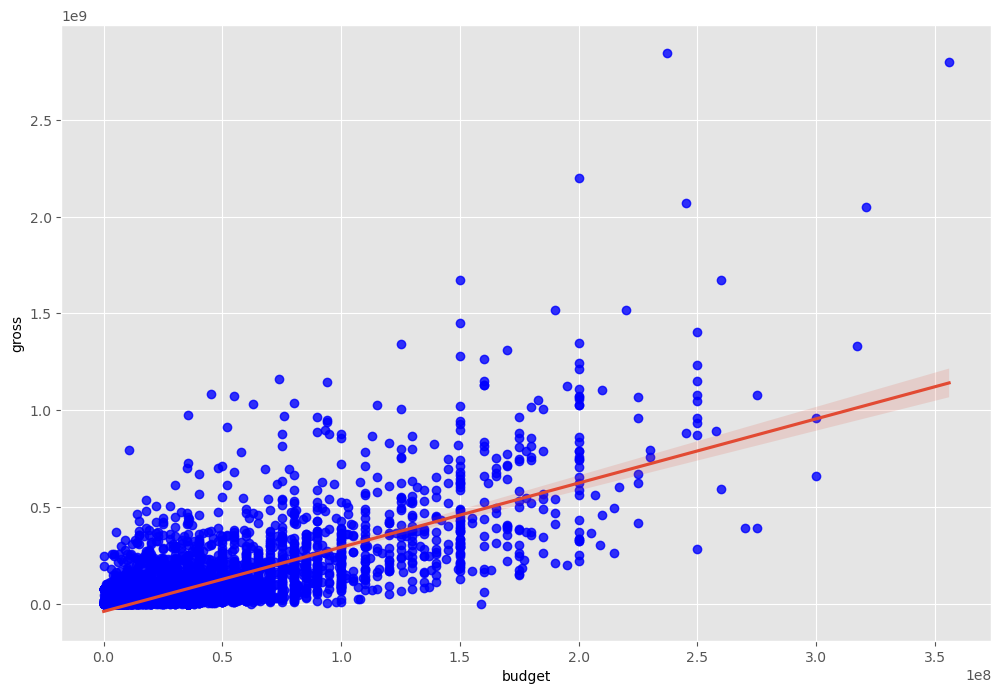

In [42]:
sns.regplot(x= 'budget', y= 'gross', data = df, scatter_kws = {"color" : "blue"})

In [43]:
#FINDING CORRELATION BETWEEN DIFFERENT PARAMETERS.

df.corr(method = 'pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.265578,0.252042,0.120811
score,0.097995,1.000000,0.409182,0.064554,0.182868,0.399451
votes,0.222945,0.409182,1.000000,0.421090,0.628713,0.309212
budget,0.265578,0.064554,0.421090,1.000000,0.711270,0.265305
gross,0.252042,0.182868,0.628713,0.711270,1.000000,0.241336
runtime,0.120811,0.399451,0.309212,0.265305,0.241336,1.000000


In [44]:
correlation_matrix = df.corr(method = 'pearson')

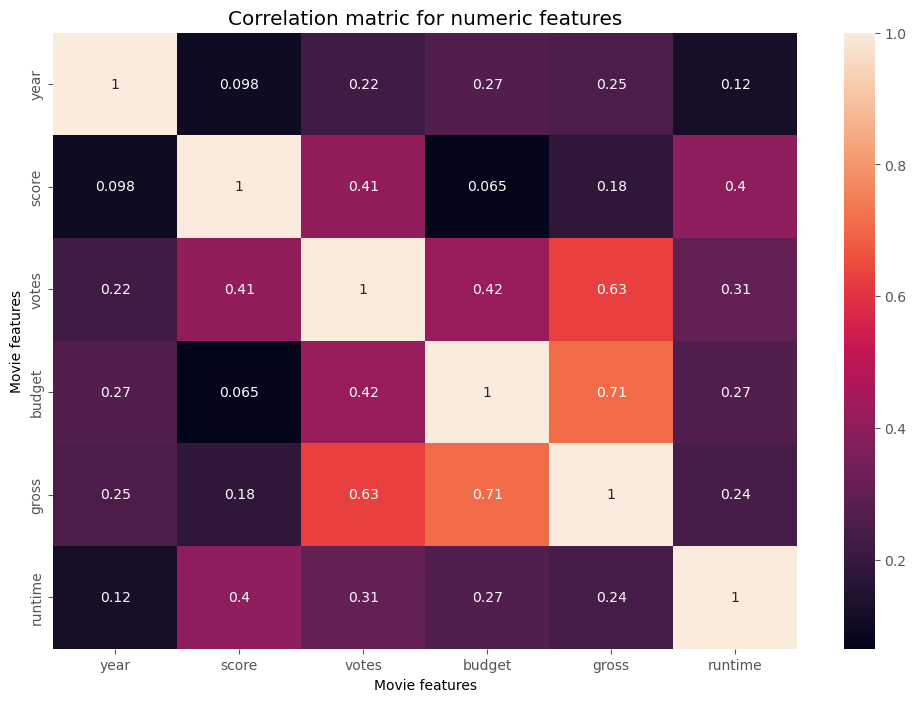

In [45]:
sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation matric for numeric features')
plt.xlabel('Movie features')
plt.ylabel('Movie features')
plt.show()

In [46]:
# ASSIGNING NUMERIC VALUES TO NON-NUMERIC FEATURES.

df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized.head()



,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_year
5445,533,5,0,2009,696,7.8,1100000.0,1155,1778,2334,55,237000000,2847246203,2253,162.0,29
7445,535,5,0,2019,183,8.4,903000.0,162,743,2241,55,356000000,2797501328,1606,181.0,39
3045,6896,5,6,1997,704,7.8,1100000.0,1155,1778,1595,55,200000000,2201647264,2253,194.0,17
6663,5144,5,0,2015,698,7.8,876000.0,1125,2550,524,55,245000000,2069521700,1540,138.0,35
7244,536,5,0,2018,192,8.4,897000.0,162,743,2241,55,321000000,2048359754,1606,149.0,38


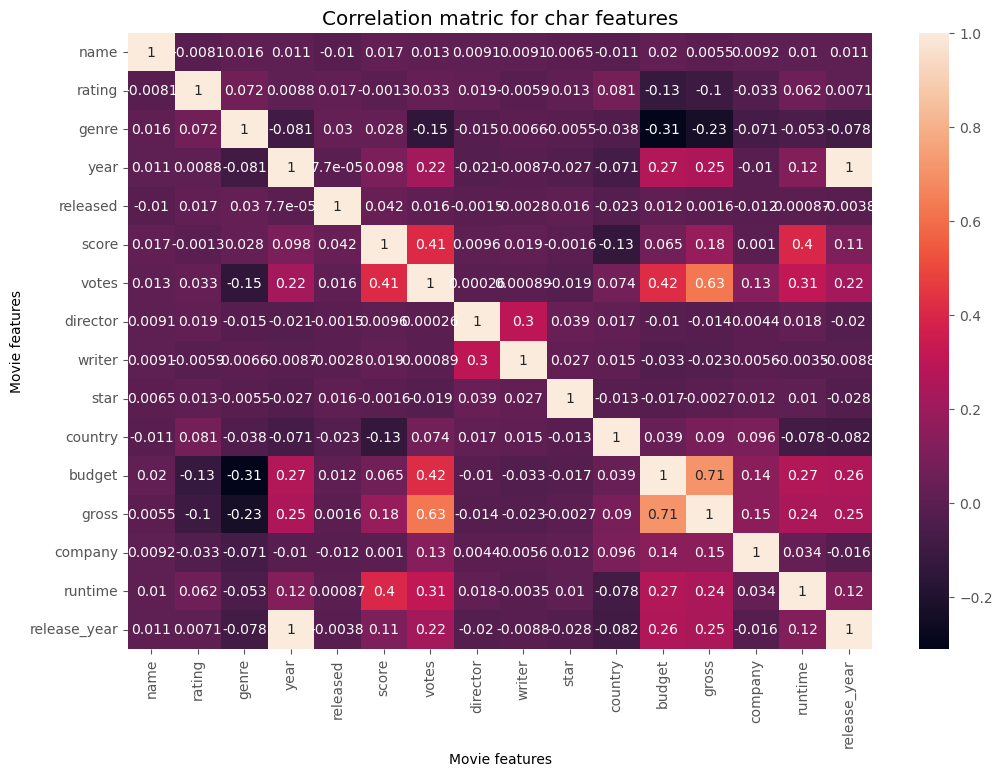

In [47]:
# FINDING CORRELATION WITH GROSS INCLUDING NUMERIC AS WELL AS NON-NUMERIC VARIABLES.

correlation_matrix = df_numerized.corr(method = 'pearson')

sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation matric for char features')
plt.xlabel('Movie features')
plt.ylabel('Movie features')
plt.show()

In [48]:
correlation_matrix

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_year
name,1.000000,-0.008069,0.016355,0.011453,-0.010480,0.017097,0.013088,0.009079,0.009081,0.006472,-0.010737,0.020368,0.005466,0.009211,0.010392,0.011134
rating,-0.008069,1.000000,0.072423,0.008779,0.017208,-0.001314,0.033225,0.019483,-0.005921,0.013405,0.081244,-0.126046,-0.102116,-0.032943,0.062145,0.007054
genre,0.016355,0.072423,1.000000,-0.081261,0.030429,0.027965,-0.145307,-0.015258,0.006567,-0.005477,-0.037615,-0.310566,-0.230267,-0.071067,-0.052711,-0.077550
year,0.011453,0.008779,-0.081261,1.000000,0.000077,0.097995,0.222945,-0.020795,-0.008656,-0.027242,-0.070938,0.265578,0.252042,-0.010431,0.120811,0.997295
released,-0.010480,0.017208,0.030429,0.000077,1.000000,0.042148,0.016154,-0.001526,-0.002784,0.015805,-0.023408,0.012263,0.001636,-0.012269,0.000868,-0.003819
score,0.017097,-0.001314,0.027965,0.097995,0.042148,1.000000,0.409182,0.009559,0.019416,-0.001609,-0.133348,0.064554,0.182868,0.001030,0.399451,0.105601
votes,0.013088,0.033225,-0.145307,0.222945,0.016154,0.409182,1.000000,0.000260,0.000892,-0.019282,0.073625,0.421090,0.628713,0.133204,0.309212,0.218364
director,0.009079,0.019483,-0.015258,-0.020795,-0.001526,0.009559,0.000260,1.000000,0.299067,0.039234,0.017490,-0.010364,-0.014272,0.004404,0.017624,-0.020439
writer,0.009081,-0.005921,0.006567,-0.008656,-0.002784,0.019416,0.000892,0.299067,1.000000,0.027245,0.015343,-0.033216,-0.023210,0.005646,-0.003511,-0.008807
star,0.006472,0.013405,-0.005477,-0.027242,0.015805,-0.001609,-0.019282,0.039234,0.027245,1.000000,-0.012998,-0.016628,-0.002682,0.012442,0.010174,-0.027576


In [49]:
correlation_pairs = correlation_matrix.unstack()

In [50]:
correlation_pairs.head(20)

name    name            1.000000
        rating         -0.008069
        genre           0.016355
        year            0.011453
        released       -0.010480
        score           0.017097
        votes           0.013088
        director        0.009079
        writer          0.009081
        star            0.006472
        country        -0.010737
        budget          0.020368
        gross           0.005466
        company         0.009211
        runtime         0.010392
        release_year    0.011134
rating  name           -0.008069
        rating          1.000000
        genre           0.072423
        year            0.008779
dtype: float64

In [51]:
sorted_pairs = correlation_pairs.sort_values()

In [52]:
sorted_pairs.head(20)

genre         budget         -0.310566
budget        genre          -0.310566
genre         gross          -0.230267
gross         genre          -0.230267
votes         genre          -0.145307
genre         votes          -0.145307
score         country        -0.133348
country       score          -0.133348
rating        budget         -0.126046
budget        rating         -0.126046
gross         rating         -0.102116
rating        gross          -0.102116
release_year  country        -0.082274
country       release_year   -0.082274
year          genre          -0.081261
genre         year           -0.081261
country       runtime        -0.078412
runtime       country        -0.078412
genre         release_year   -0.077550
release_year  genre          -0.077550
dtype: float64

In [53]:
high_correlation = sorted_pairs[(sorted_pairs > 0.5) & (sorted_pairs < 1)]

In [54]:
high_correlation

votes         gross           0.628713
gross         votes           0.628713
budget        gross           0.711270
gross         budget          0.711270
release_year  year            0.997295
year          release_year    0.997295
dtype: float64

In [55]:
# THUS IT CAN BE SEEN THAT GROSS MAJORLY DEPENDS ON BUDGET AND VOTES
